<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Pr%C3%A1ctica_21_Ejercicios_con_EDA_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Programación para Analítica Descriptiva y Predictiva
##Nombre de la tarea: Ejercicios con EDA  Parte 2
##Grupo: A
##Autor: Jose Daniel Isidoro Reyes
##Matrícula: 261552
##Fecha:03 de octubre de 2025

# Carga del conjunto de datos

In [11]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
data.isnull().mean()

,0
age,0.0
year,0.0
nodes,0.0
status,0.0


## Descripción de los datos

In [14]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Histogramas para las columnas númericas



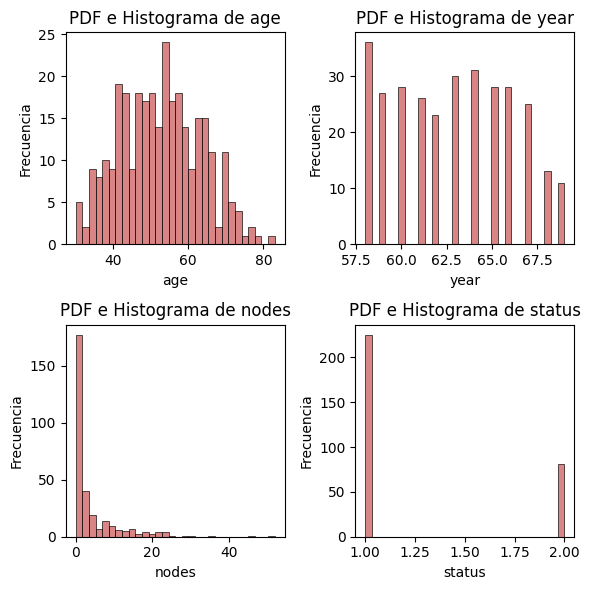

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

col_nums =  data.select_dtypes(include  = "number").columns

# Crear histogramas para cada columna
plt.figure(figsize =  (6, 6))
for i, col  in enumerate(col_nums, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins  =  30, color  = "#CD5C5C")
    plt.title(f"PDF e Histograma de {col}", fontsize =  12)
    plt.xlabel(col, fontsize  = 10)
    plt.ylabel("Frecuencia", fontsize = 10)

plt.tight_layout()
plt.show()

##Gráficas de barras para la columna categórica status (supervivencia).



/tmp/ipython-input-2830724131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =  "status", data =  data, palette = "viridis")


Text(0, 0.5, 'Frecuencia')

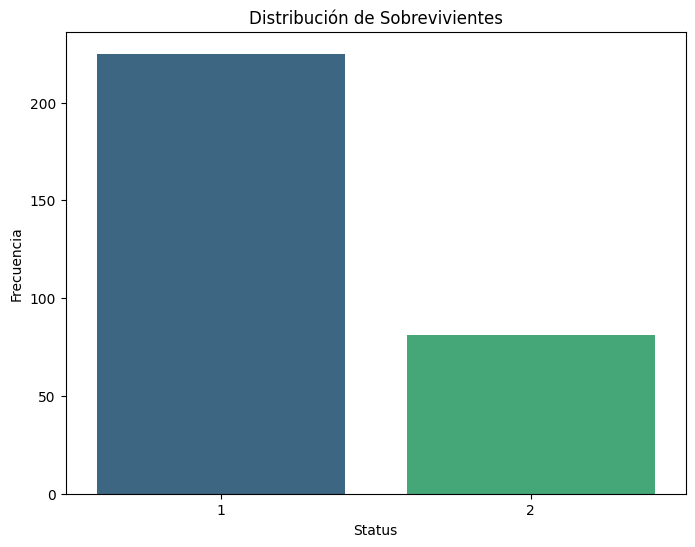

In [16]:
plt.figure(figsize =  (8, 6))
sns.countplot(x =  "status", data =  data, palette = "viridis")
plt.title("Distribución de Sobrevivientes")
plt.xlabel("Status")
plt.ylabel("Frecuencia")

# Boxplots para identificar outliers

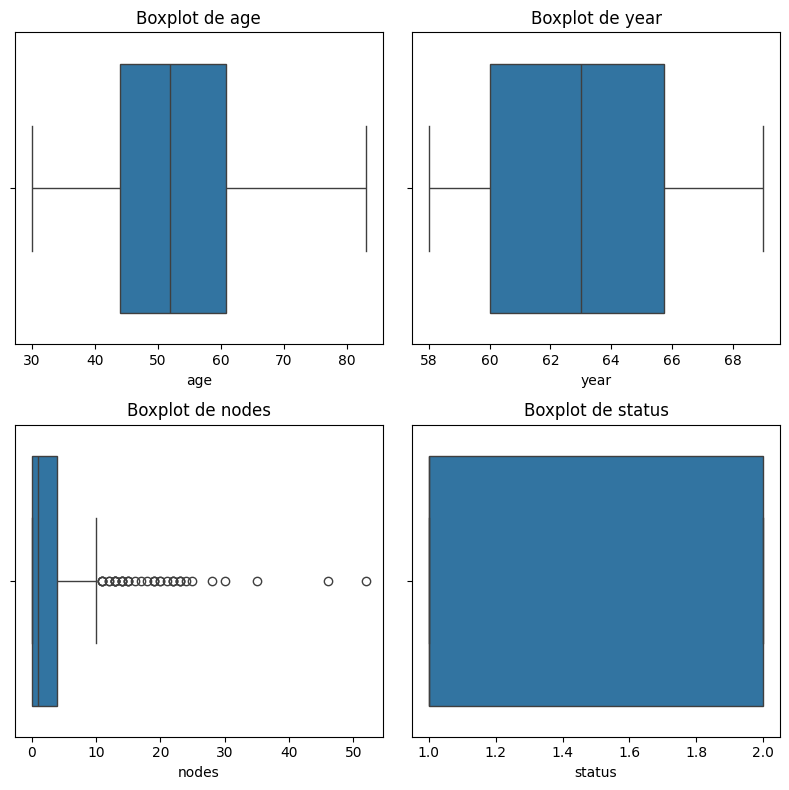

In [17]:
numeric_cols  =  data.select_dtypes(include  =  "number").columns

plt.figure(figsize =  (8 , 8))

# Creación de Boxplots para cada variable
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x =  data[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Matriz y de Correlación y Heatmap de correlaciones

---Matriz de Correlación---
             age      year     nodes    status
age     1.000000  0.089529 -0.063176  0.067950
year    0.089529  1.000000 -0.003764 -0.004768
nodes  -0.063176 -0.003764  1.000000  0.286768
status  0.067950 -0.004768  0.286768  1.000000


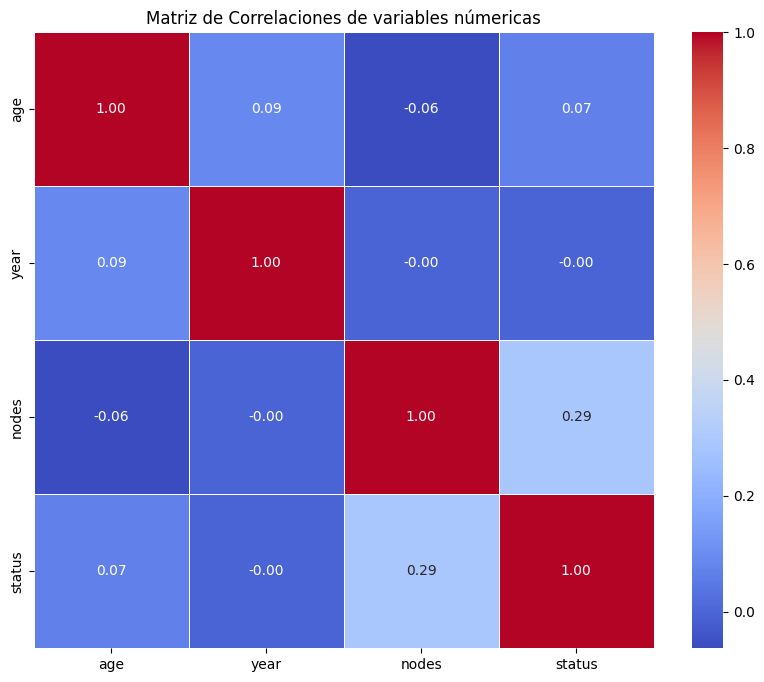

In [18]:
num_cols =  data.select_dtypes(include  = "number")

# Matriz de correlaciones
corr_matrix  =  num_cols.corr()
print("---Matriz de Correlación---")
print(corr_matrix)

# Heatmap de corelaciones
plt.figure(figsize =  (10, 8))
sns.heatmap(corr_matrix, annot  =  True, cmap = "coolwarm", fmt = ".2f", linewidths= 0.5)
plt.title("Matriz de Correlaciones de variables númericas")
plt.show()

# Pairplot

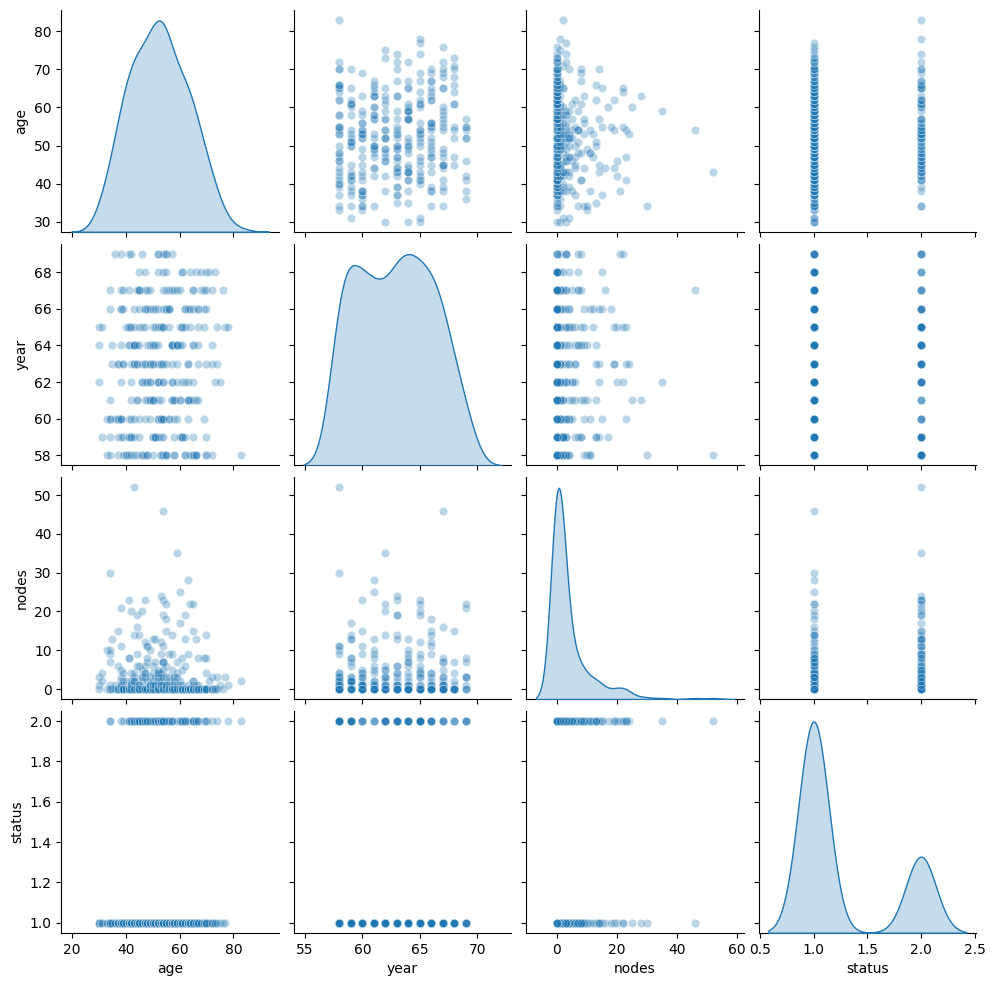

In [19]:
numerical_cols  =  data.select_dtypes(include  = "number").columns
sns.pairplot(data[numerical_cols], plot_kws = {'alpha': 0.3}, diag_kind  =  'kde')
plt.show()

# Pruebas de Normalidad

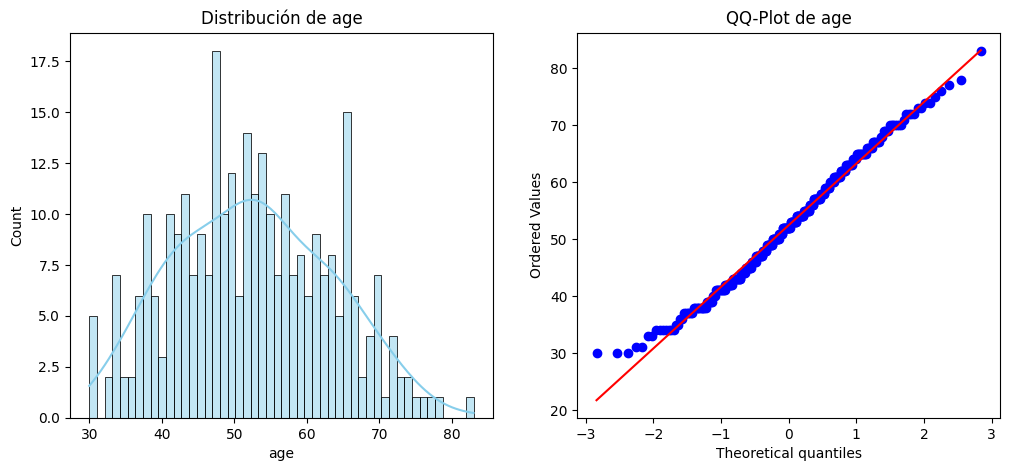


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


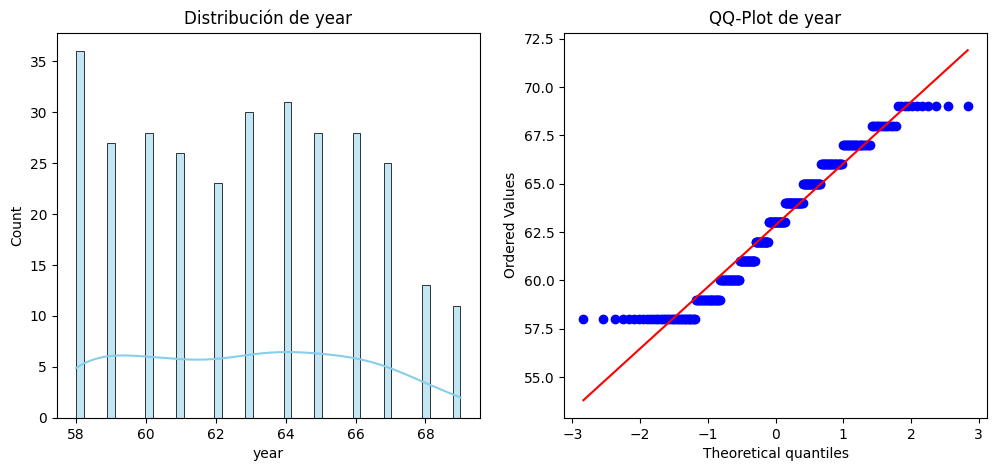


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


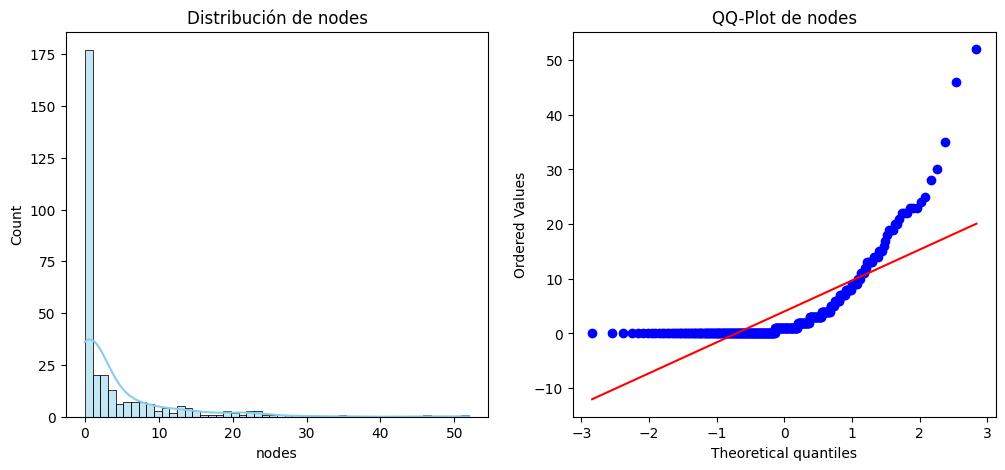


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


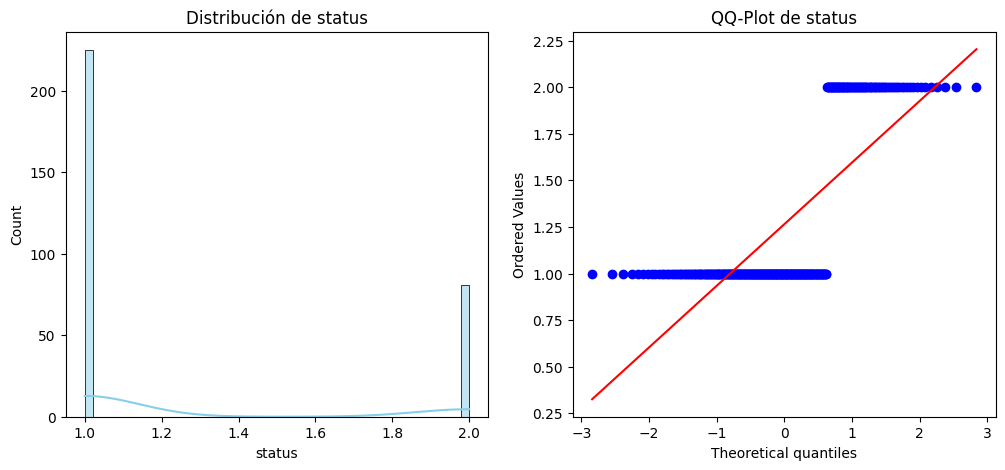


Pruebas de normalidad para la columna: status
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 71.18230
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [20]:
import scipy.stats as stats
import numpy as np
df =  data.copy()

numeric_columns  =  df.select_dtypes(include  = "number")

# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in numeric_columns:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)


#3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda.

In [21]:
df.isnull().mean()

,0
age,0.0
year,0.0
nodes,0.0
status,0.0


# Limpieza de atipicos

In [22]:
def limpiar_atipicos_iqr_capping(df):

    df_tratado = df.copy()

    columnas_numericas = df_tratado.select_dtypes(include=np.number).columns

    for columna in columnas_numericas:

        Q1 = df_tratado[columna].quantile(0.25)
        Q3 = df_tratado[columna].quantile(0.75)
        IQR = Q3 - Q1

        limite_superior = Q3 + 1.5 * IQR
        limite_inferior = Q1 - 1.5 * IQR

        df_tratado[columna] = np.where(
            df_tratado[columna] > limite_superior,
            limite_superior,
            np.where(
                df_tratado[columna] < limite_inferior,
                limite_inferior,
                df_tratado[columna]
            )
        )

    return df_tratado


df =  limpiar_atipicos_iqr_capping(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     306 non-null    float64
 1   year    306 non-null    float64
 2   nodes   306 non-null    float64
 3   status  306 non-null    float64
dtypes: float64(4)
memory usage: 9.7 KB


#4. Repetir el EDA después del tratamiento de datos faltantes

In [28]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,2.790850,1.264706
std,10.803452,3.249405,3.668481,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,10.000000,2.000000


In [ ]:
col_nums   =

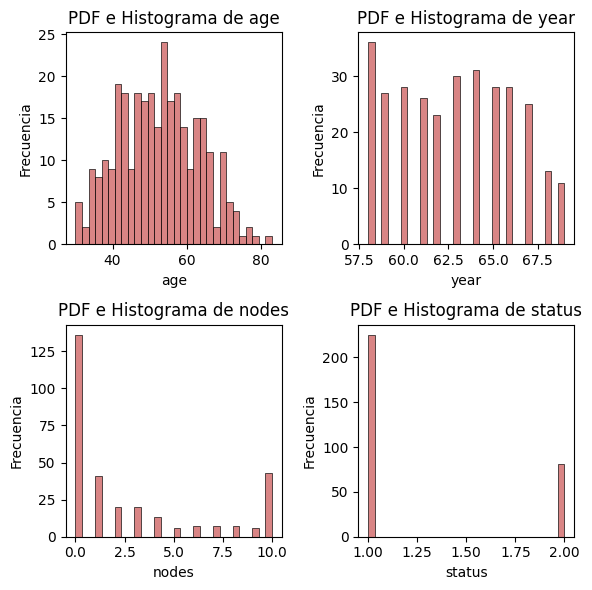

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

col_nums =  df.select_dtypes(include  = "float").columns

# Crear histogramas para cada columna
plt.figure(figsize =  (6, 6))
for i, col  in enumerate(col_nums, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins  =  30, color  = "#CD5C5C")
    plt.title(f"PDF e Histograma de {col}", fontsize =  12)
    plt.xlabel(col, fontsize  = 10)
    plt.ylabel("Frecuencia", fontsize = 10)

plt.tight_layout()
plt.show()




/tmp/ipython-input-1378236324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =  "status", data =  df, palette = "viridis")


Text(0, 0.5, 'Frecuencia')

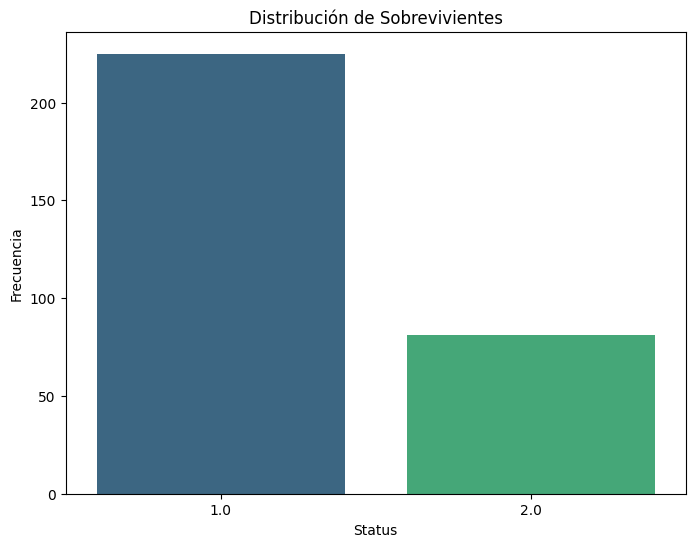

In [32]:

plt.figure(figsize =  (8, 6))
sns.countplot(x =  "status", data =  df, palette = "viridis")
plt.title("Distribución de Sobrevivientes")
plt.xlabel("Status")
plt.ylabel("Frecuencia")




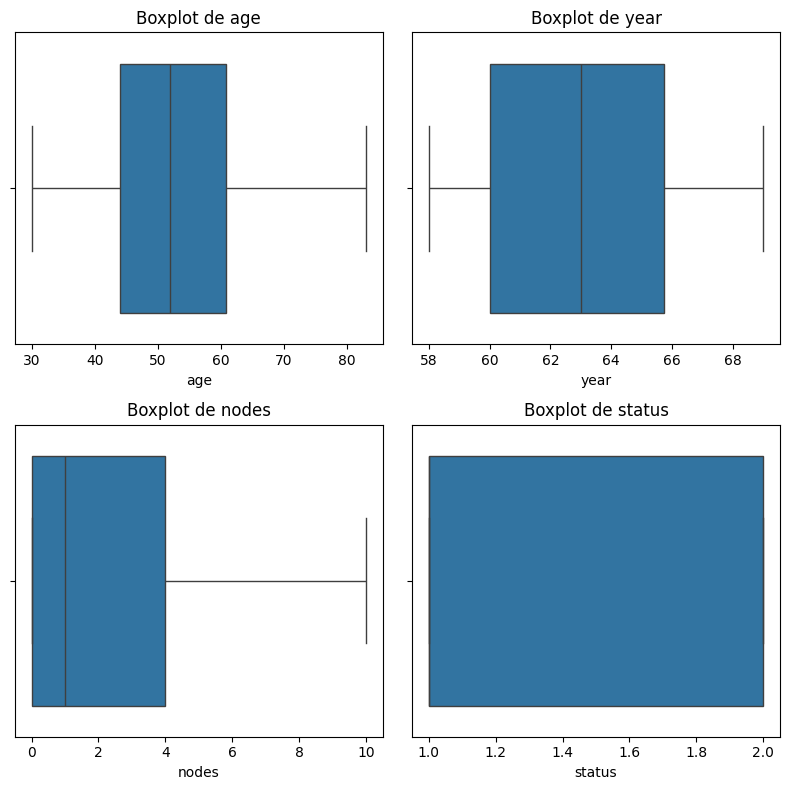

In [33]:
numeric_cols  =  df.select_dtypes(include  =  "number").columns

plt.figure(figsize =  (8 , 8))

# Creación de Boxplots para cada variable
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x =  df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()




---Matriz de Correlación---
             age      year     nodes    status
age     1.000000  0.089529 -0.090150  0.067950
year    0.089529  1.000000 -0.000113 -0.004768
nodes  -0.090150 -0.000113  1.000000  0.341685
status  0.067950 -0.004768  0.341685  1.000000


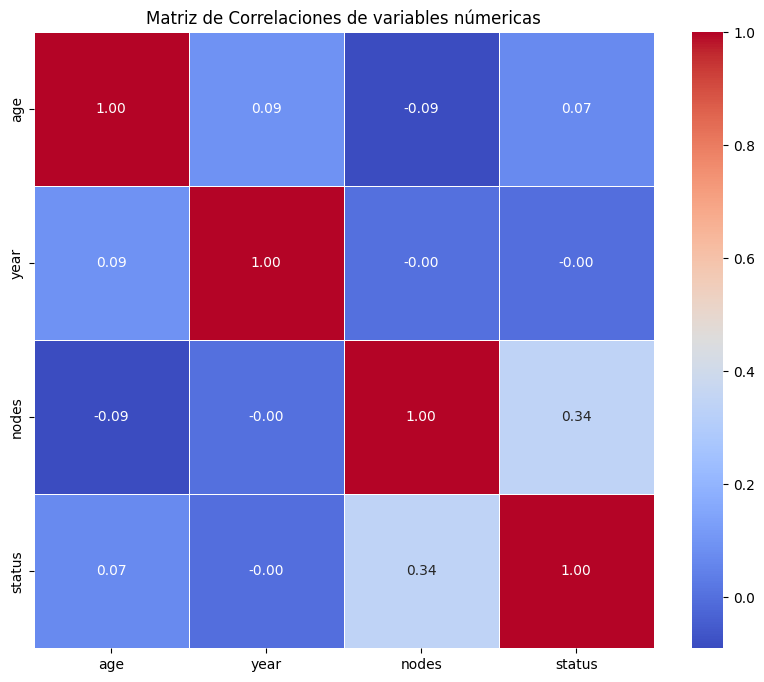

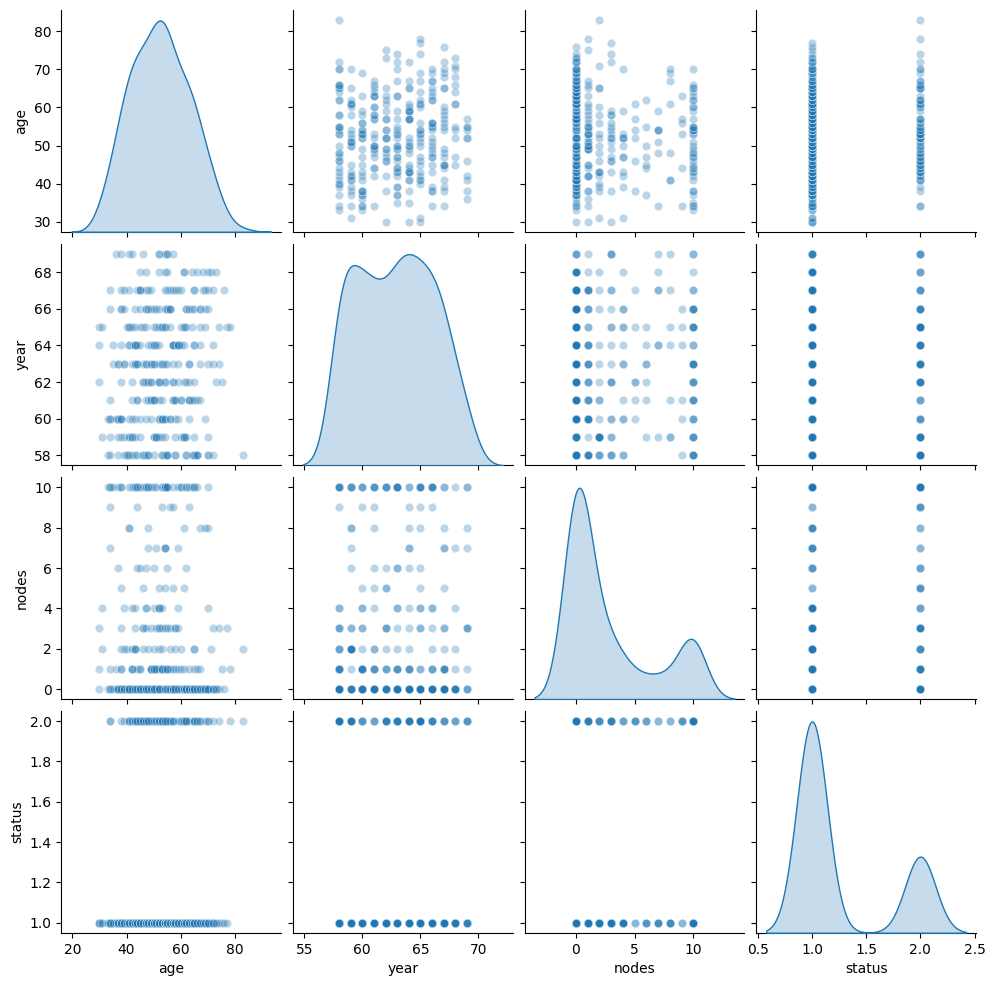

In [34]:
num_cols =  df.select_dtypes(include  = "number")

# Matriz de correlaciones
corr_matrix  =  num_cols.corr()
print("---Matriz de Correlación---")
print(corr_matrix)

# Heatmap de corelaciones
plt.figure(figsize =  (10, 8))
sns.heatmap(corr_matrix, annot  =  True, cmap = "coolwarm", fmt = ".2f", linewidths= 0.5)
plt.title("Matriz de Correlaciones de variables númericas")
plt.show()


numerical_cols  =  df.select_dtypes(include  = "number").columns
sns.pairplot(df[numerical_cols], plot_kws = {'alpha': 0.3}, diag_kind  =  'kde')
plt.show()

In [35]:
df["status"].value_counts()

,count
status,
1.0,225
2.0,81
